In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, RepeatedKFold, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR, NuSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor

In [68]:
df = pd.read_csv('almost_df.csv')
df.isnull().sum()

Unnamed: 0                      0
make_bmw                        0
make_chevrolet                  0
make_dodge                      0
make_ford                       0
make_honda                      0
make_jeep                       0
make_mercedesbenz               0
make_nissan                     0
make_toyota                     0
make_infrequent_sklearn         0
model_challenger                0
model_ecosport                  0
model_equinox                   0
model_escape                    0
model_f150                      0
model_fusion                    0
model_grandcherokee             0
model_ram2500pickup             0
model_silverado1500             0
model_infrequent_sklearn        0
city_anchorage/matsu            0
city_bronx                      0
city_brooklyn                   0
city_clintontownship            0
city_danbury                    0
city_novi                       0
city_rochesterhills             0
city_stamford                   0
city_waterbury

In [69]:
df.shape

(51762, 57)

In [70]:
df = df.dropna()
df = df.drop(columns="Unnamed: 0")
df.shape

(35585, 56)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'), df['price'], test_size=0.2, random_state=42)

In [44]:
X_train

,make_bmw,make_chevrolet,make_dodge,make_ford,make_honda,make_jeep,make_mercedesbenz,make_nissan,make_toyota,make_infrequent_sklearn,...,transmission_manual,transmission_other,drive_4wd,drive_4x2,drive_awd,drive_fwd,drive_rwd,year,mileage,engine
33338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2013.0,85150.0,2.0
25760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019.0,15716.0,4.3
6580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012.0,58393.0,4.0
36154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2017.0,50867.0,3.0
28679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,40258.0,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020.0,12000.0,1.3
9057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2014.0,76930.0,3.0
16352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2020.0,5.0,3.0
1249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2012.0,83350.0,2.0


In [71]:
scaler = StandardScaler()

X_train_num = X_train[['year', 'mileage', 'engine']]
X_test_num = X_test[['year', 'mileage', 'engine']]

scaler.fit(X_train_num)

X_train.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_num)
X_test.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_num)

X_train

,make_bmw,make_chevrolet,make_dodge,make_ford,make_honda,make_jeep,make_mercedesbenz,make_nissan,make_toyota,make_infrequent_sklearn,...,transmission_manual,transmission_other,drive_4wd,drive_4x2,drive_awd,drive_fwd,drive_rwd,year,mileage,engine
33338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.540032,0.612804,-0.760823
25760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.640089,-0.632190,0.996737
6580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.736719,0.133035,0.767490
36154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.246715,-0.001911,0.003334
28679,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.443402,-0.192137,1.073153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.836776,-0.698820,-1.295732
9057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.343345,0.465415,0.003334
16352,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.836776,-0.913898,0.003334
1249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.736719,0.580529,-0.760823


In [72]:
dtr = DecisionTreeRegressor(max_depth=20, min_samples_leaf=35).fit(X_train, y_train)

dtr.score(X_test, y_test)

0.48365336785395163

### Algorithm Comparison

We begin building our model by first consdering a number of regression algorithms. Scikit-learn provides us with many options. We consider the following algorithms, with their corresponding Scikit-learn class. 
- Decision Trees, implemented as `DecisionTreeRegressor`
- Support Vector Machines, implemented as `LinearSVR`. We use `LinearSVR` since it perofrms better than `SVR` on larger datasets. 
- k-Nearest Neighbors, implemented as `KNeighborsRegressor`
- AdaBoost, implemented as `AdaBoostRegressor`
- Gradient Boosting, implemented as `GradientBoostingRegressor`
- Neural Networks, implemented as `MLPRegressor`

To compare these algorithms, we perform 3x5 cross validation on each and compare their mean R-squared scores and mean Negative MSE scores. Since we wish to gain a baseline on how each of these algorithms will perform, we use most of these algorithms with their default Scikit-learn parameters, and only change them when the default parameters lead to extremely low scores. 

In [52]:
models = []

models.append(('DTR', DecisionTreeRegressor()))
models.append(('LSVR', LinearSVR(C=0.1, max_iter=5000, loss="squared_epsilon_insensitive")))
models.append(('KNNR', KNeighborsRegressor(n_jobs=-1)))
models.append(('RFR', RandomForestRegressor(n_jobs=-1)))
models.append(('ABR', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=100)))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('BR', BaggingRegressor(n_jobs=-1)))
models.append(('NNR', MLPRegressor(learning_rate_init=0.1, max_iter=1000)))
models.append(('SGDR', SGDRegressor()))

r2_results = []
mse_results = []
names = []
rkfold = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

for name, model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=rkfold, scoring=('r2', "neg_mean_squared_error"), n_jobs = -1)
    r2_results.append(cv_results['test_r2'])
    mse_results.append(cv_results['test_neg_mean_squared_error'])
    names.append(name)
    print("%s \tR-Squared: %f (%f), \t Negative MSE: %f (%f)" % (name, cv_results['test_r2'].mean(), cv_results['test_r2'].std(), cv_results['test_neg_mean_squared_error'].mean(), cv_results['test_neg_mean_squared_error'].std()))

DTR 	R-Squared: 0.215559 (0.267233), 	 Negative MSE: -593136862.652523 (182035015.385036)
LSVR 	R-Squared: 0.304139 (0.051698), 	 Negative MSE: -545839849.918022 (142797467.122049)
KNNR 	R-Squared: 0.322373 (0.055244), 	 Negative MSE: -531771511.356631 (139013741.415938)
RFR 	R-Squared: 0.610483 (0.072836), 	 Negative MSE: -305597394.146308 (100428978.541540)
ABR 	R-Squared: 0.597217 (0.085826), 	 Negative MSE: -318355544.172518 (117945543.320292)
GBR 	R-Squared: 0.592535 (0.056922), 	 Negative MSE: -319825883.715268 (95070885.298117)
BR 	R-Squared: 0.554126 (0.095557), 	 Negative MSE: -341792813.018982 (88377901.490958)
NNR 	R-Squared: 0.345722 (0.067352), 	 Negative MSE: -509372067.793205 (122264707.761112)
SGDR 	R-Squared: 0.303204 (0.052203), 	 Negative MSE: -546623147.129052 (143103564.083752)


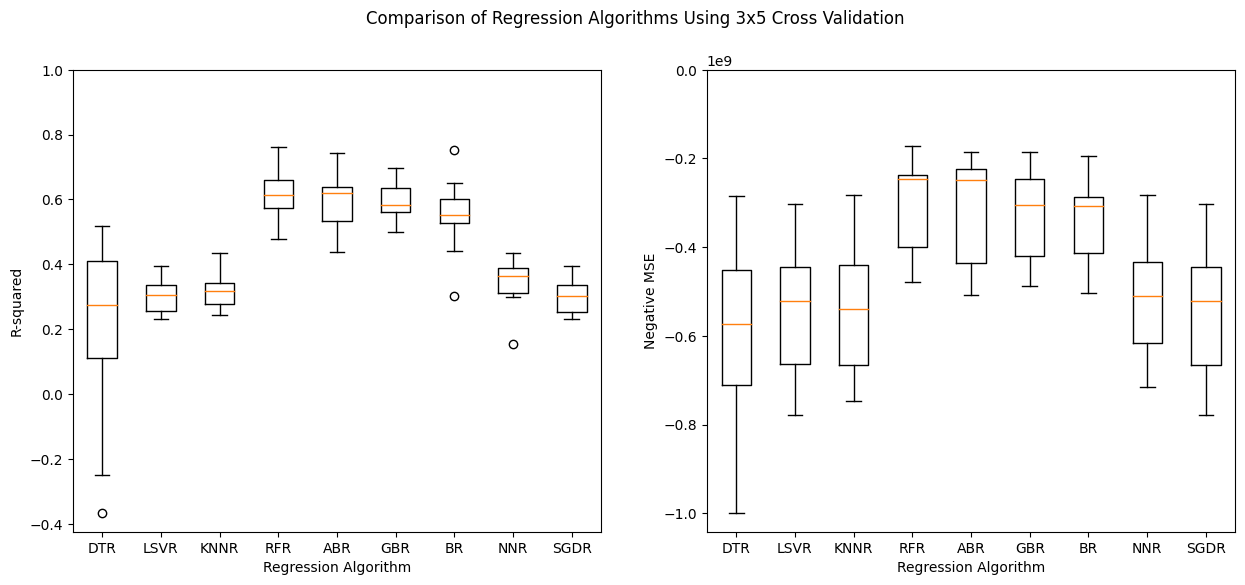

In [66]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('Comparison of Regression Algorithms Using 3x5 Cross Validation')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(r2_results)
ax2.boxplot(mse_results)
ax1.set_xticklabels(names)
ax1.set_xlabel("Regression Algorithm")
ax1.set_ylabel("R-squared")
ax2.set_xticklabels(names)
ax2.set_xlabel("Regression Algorithm")
ax2.set_ylabel("Negative MSE")
ax1.set_ylim(top=1)
ax2.set_ylim(top=0)
plt.show()

We see that `RandomForestRegressor` has both the greatest mean R-squared score as well as greatest mean Negative MSE score, which makes it a top candidate for consideration. We also see that `AdaBoostRegressor`, `GradientBoostRegressor`, and `BaggingRegressor` have promising scores. 

1. Compare algorithms using mostly default Sklearn parameters 
2. Select top performers
3. Perform models selection on each selected algo 
4. If we can get them to have similar performance, perhaps combine all algo's into a ensemble 

Learning curves, validation curves? 

In [73]:
params = {
    "n_estimators": [1, 10, 100],
    "max_depth": [1, 10, 100],
    "min_samples_split": [1, 10, 100],
    "min_samples_leaf": [1, 10, 100],
    "max_features": [None, "sqrt", "log2"],
    "bootstrap": [True, False]
}

gc = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid = params, n_jobs = -1, scoring = "r2", verbose= 1)

In [74]:
gc.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


KeyboardInterrupt: 

In [1]:
import geocoder

In [27]:
g = geocoder.arcgis("")

In [28]:
print(g.latlng)

[27.770860000000027, -82.67926999999997]


In [26]:
g = geocoder.osm("Austin, TX")
print(g.latlng)

[30.2711286, -97.7436995]
